<a href="https://colab.research.google.com/github/fralfaro/MAT306/blob/main/docs/labs/lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT306 - Laboratorio N°07

**Objetivo**: Aplicar técnicas básicas de **Machine Learning** (tanto regresión como clasificación), desde la preparación de datos hasta el entrenamiento y evaluación de modelos.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.



## Regresión


<img src="https://cdn-icons-png.flaticon.com/512/2400/2400362.png" width = "300" align="center"/>


Los datos utilizados corresponden a propiedades localizadas en un distrito específico de California, junto con algunas estadísticas resumen extraídas del censo de 1990. Es importante tener en cuenta que los datos no han sido procesados previamente, por lo que será necesario realizar algunas etapas de limpieza y preprocesamiento.

Las columnas incluidas en el conjunto de datos son las siguientes (sus nombres son descriptivos):

* **longitude**: Longitud geográfica de la propiedad.
* **latitude**: Latitud geográfica de la propiedad.
* **housingmedianage**: Edad media de las viviendas en la zona.
* **total_rooms**: Número total de habitaciones.
* **total_bedrooms**: Número total de dormitorios.
* **population**: Población en el área circundante.
* **households**: Número de hogares en la zona.
* **median_income**: Ingreso medio por hogar.
* **medianhousevalue**: Valor medio de la propiedad.
* **ocean_proximity**: Proximidad al océano.

El objetivo de este análisis es predecir el valor medio de las propiedades utilizando las características proporcionadas.

Para completar este laboratorio, se recomienda seguir la siguiente rúbrica de trabajo:

1. **Definición del problema**: Clarificar el objetivo del análisis y los resultados esperados.
2. **Estadística descriptiva**: Resumir las principales características de los datos a través de medidas estadísticas.
3. **Visualización descriptiva**: Utilizar gráficos para explorar los datos y sus relaciones.
4. **Preprocesamiento**: Realizar los pasos necesarios de limpieza y transformación de los datos.
5. **Selección de modelo**: Comparar al menos cuatro modelos de predicción diferentes.
6. **Métricas y análisis de resultados**: Evaluar el rendimiento de los modelos utilizando métricas apropiadas.
7. **Visualización de resultados del modelo**: Crear gráficos que muestren el desempeño de los modelos.
8. **Conclusiones**: Resumir los hallazgos del análisis.

> **Nota**: Se anima a los estudiantes a desarrollar un análisis más profundo si lo desean. Pueden consultar como referencia el siguiente [enlace](https://www.kaggle.com/camnugent/california-housing-prices).

In [51]:
#Librerías.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [53]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**Definición del Problema**: En el problema analizaremos las diversas columnas del dataFrame utilizando la media. La idea es poder predecir el estadístico de la media de los diferentes datos asociados a las propiedades.

**Estadística Descriptiva**

In [54]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [55]:
housing.dtypes

,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
target,float64



Vemos que todos los datos datos son de tipo entero y que la longitud y la latitud tienen una desviación estandar particularmente baja. Mientras que Population tiene una desviación estandar particularmente alta.

**Visualización Descriptiva:**

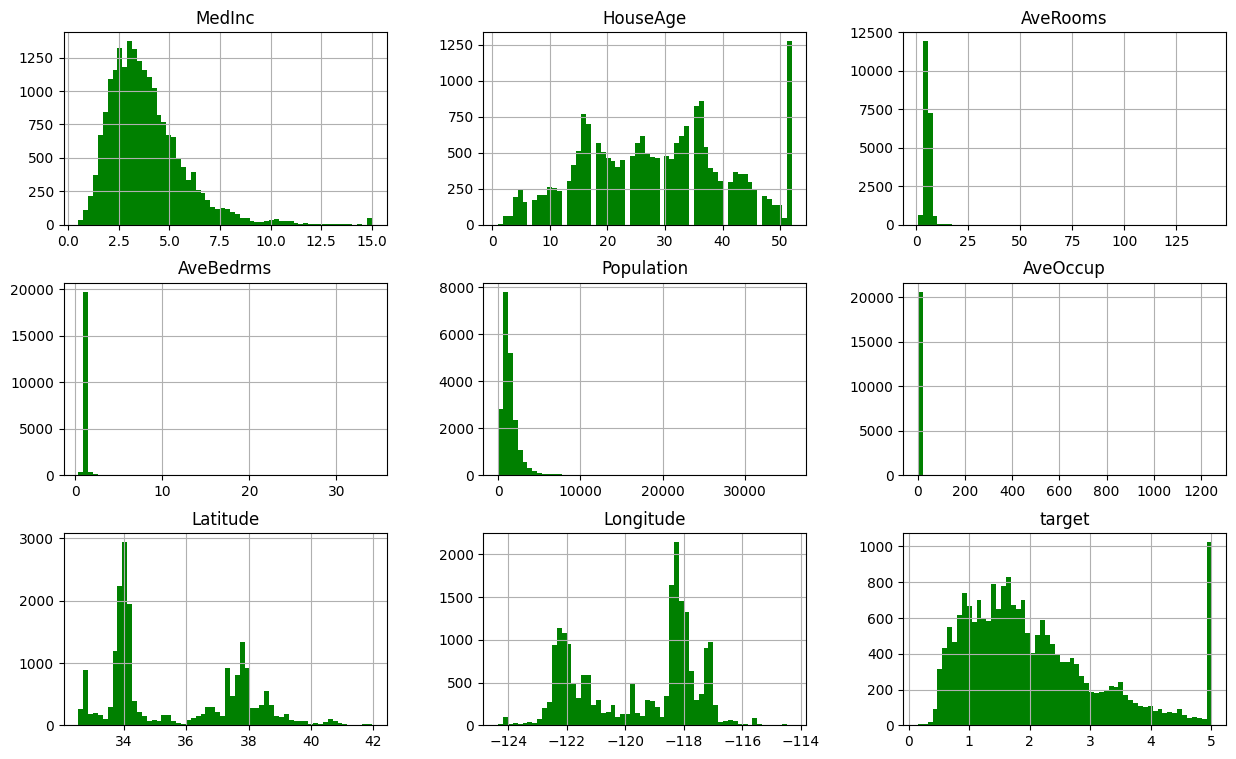

In [56]:
housing.hist(bins=60, figsize=(15,9), color='green')
plt.show()

- En Latitude y Longitud hay dos picos de cantidad de datos.
- AvaRooms, AveBedrms, Population y AveOccup, parecen tener los datos muy concentrados en un solo intervalo, sin embargo la varianza de Population es demasiado alta.
- HouseAge presenta unos saltos de edad y tiene un Peak cerca de los 50 años.

**Procesamiento:**

In [57]:
clean_data = housing
n_data = clean_data.shape[0]
for col in clean_data.columns:
    if col != "target":
        mean = clean_data[col].mean()
        std = clean_data[col].std()
        clean_data = clean_data[np.absolute(clean_data[col]-mean)<2*std].reset_index().drop(columns ="index")
print(f"Porcentaje de datos eliminados: {(1-clean_data.shape[0]/n_data)*100}%")

Porcentaje de datos eliminados: 15.809108527131787%


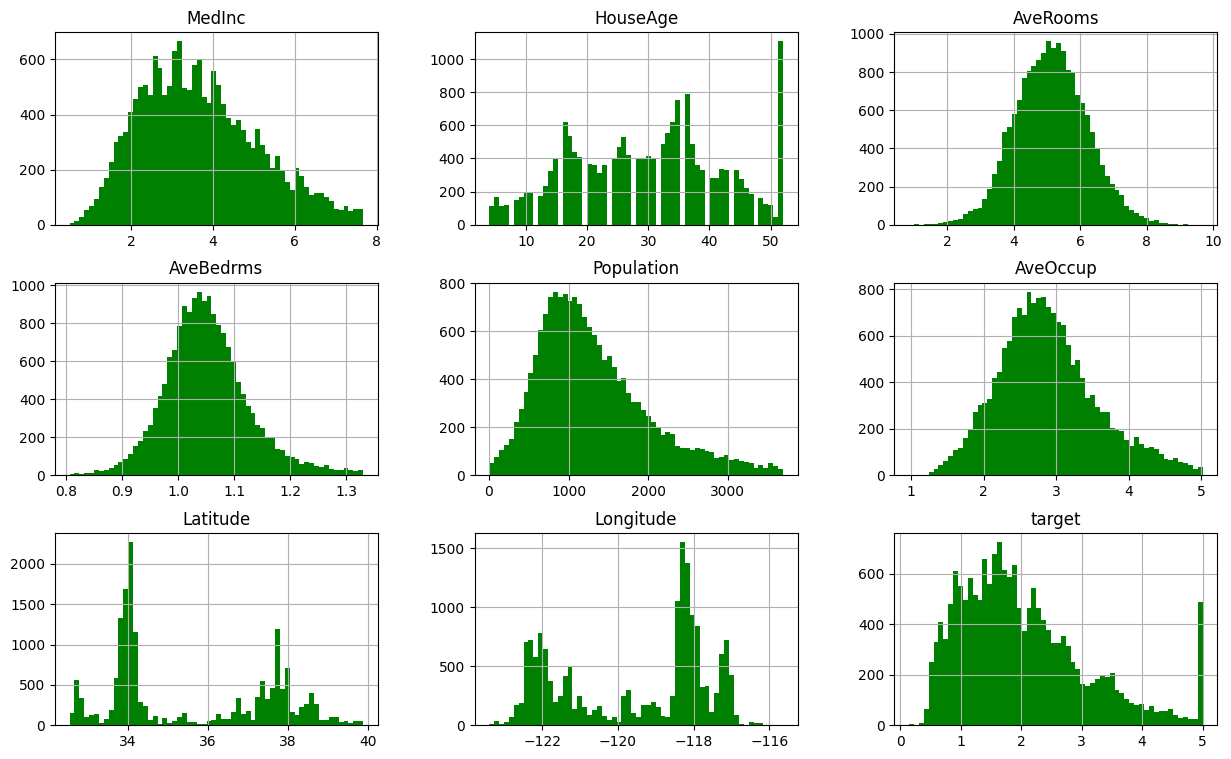

In [58]:
clean_data.hist(bins=60, figsize=(15,9), color='green')
plt.show()

Vemos que ahora las curvas se asemejan más a distribuciones gausianas o a mixturas gaussianas.

**Selección de Modelo y Visualización:**

In [59]:
# Datos ficticios (X son las características, y es la variable a predecir)
X = clean_data.drop(columns="target")
y = clean_data["target"] # Relación lineal con ruido

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo y ajustarlo
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = linear_model.predict(X_test)

In [60]:
LR = LinearRegression()
LR.fit(X_train, y_train)

df_LR = pd.DataFrame({'y': y_test, 'yhat': LR.predict(X_test)})
df_LR_results = regression_metrics(df_LR)
df_LR_results

,mae,mse,rmse,mape,smape
0,0.468,0.4024,0.6343,28.9003,0.4484


In [61]:
# Crear el modelo SVR
svr_model = SVR(kernel='rbf')  # RBF es un kernel común para relaciones no lineales
svr_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = svr_model.predict(X_test)

# Evaluar el modelo
df_SVR= pd.DataFrame({'y': y_test, 'yhat': y_pred})
df_SVR_results = regression_metrics(df_SVR)
df_SVR_results

,mae,mse,rmse,mape,smape
0,0.7825,1.0593,1.0292,49.9046,0.6658


In [62]:
# Crear el modelo de Árbol de Decisión
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = tree_model.predict(X_test)

# Evaluar el modelo
df_tree_model= pd.DataFrame({'y': y_test, 'yhat': y_pred})
df_tree_model_results = regression_metrics(df_tree_model)
df_tree_model_results

,mae,mse,rmse,mape,smape
0,0.4342,0.4695,0.6852,23.3477,0.3786


In [63]:
# Crear el modelo Random Forest
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 árboles
forest_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = forest_model.predict(X_test)

# Evaluar el modelo
df_RF= pd.DataFrame({'y': y_test, 'yhat': y_pred})
df_RF_results = regression_metrics(df_RF)
df_RF_results

,mae,mse,rmse,mape,smape
0,0.3169,0.2381,0.4879,17.795,0.3021


**Métricas y análiss de resultados:** Vemos que Random Forest tiene errores más bajos. Es decir, nos da la mejor aproximación.

**Conclusiones:** Luego de limpiar los datos, vemos que el Random Forest es el modelo más apropiado para aproximar.

## Clasificación


<img src="https://miro.medium.com/v2/resize:fit:372/0*EwdH1C6ThmpwY0Qo.png" width = "400" align="center"/>

El objetivo de este proyecto es realizar la mejor predicción posible de las imágenes a partir de los datos disponibles. Para lograrlo, es necesario seguir los pasos habituales en un proyecto de _Machine Learning_, que incluyen la exploración estadística, la visualización y el preprocesamiento de los datos.

Se solicita lo siguiente:

* Ajustar al menos tres modelos de clasificación:
    * Regresión logística.
    * K-Nearest Neighbors.
    * Un algoritmo adicional o más, de libre elección. Puedes consultar [esta lista de algoritmos](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) para obtener ideas.
  
* Realizar predicciones con cada uno de los tres modelos utilizando el conjunto de datos de _test_ y calcular sus respectivas puntuaciones (_score_).

* Evaluar y analizar los resultados de los modelos utilizando las siguientes métricas de rendimiento:
    * **Accuracy**
    * **Precision**
    * **Recall**
    * **F1-score**

### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [64]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [65]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [66]:
# informacion de las columnas
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [67]:
# informacion del target
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [68]:
# leer datos
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

**Distribución de datos:**

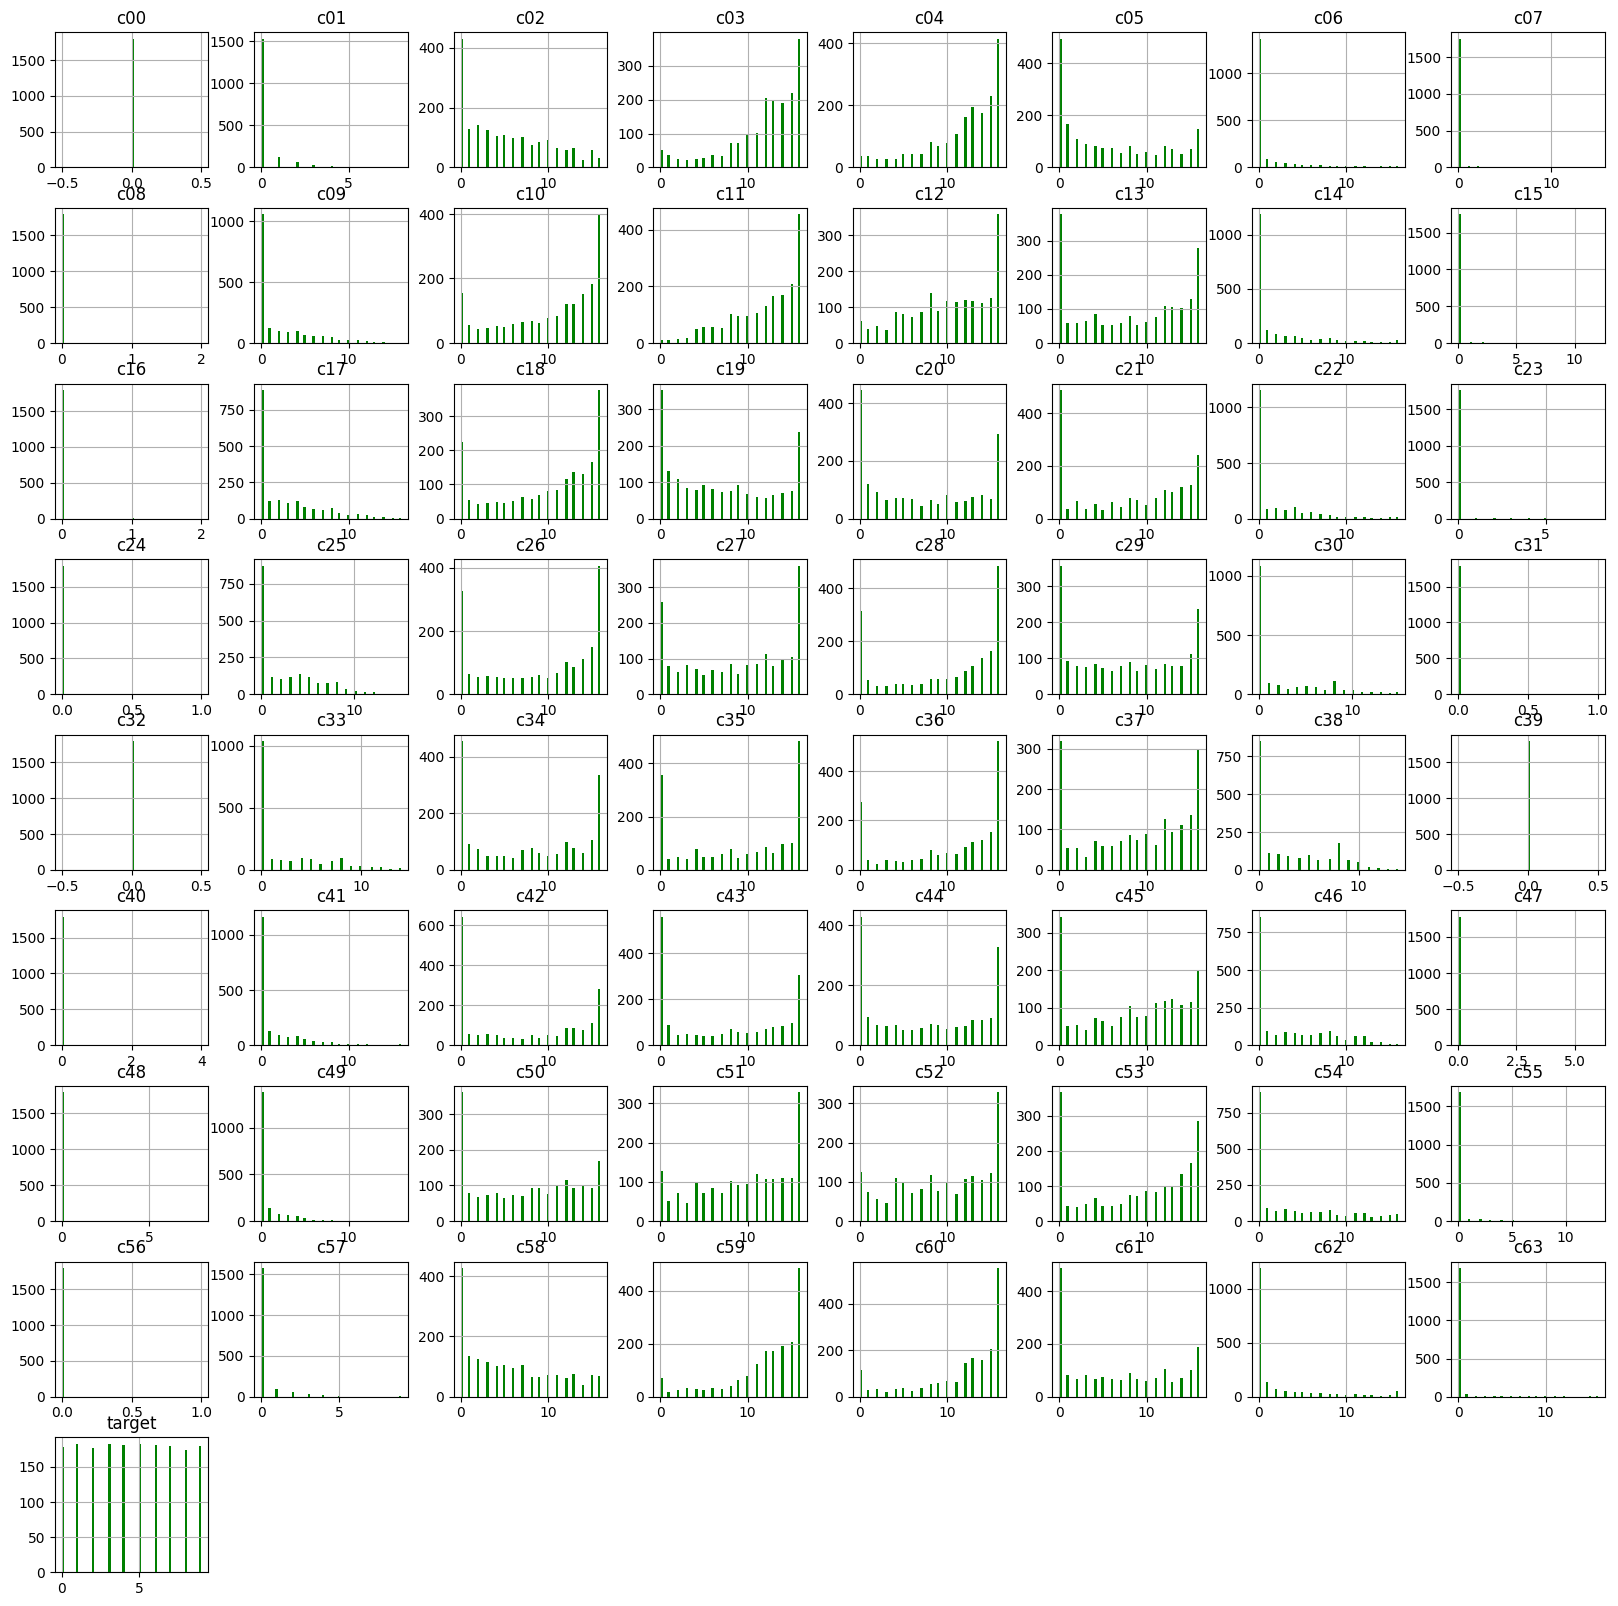

In [75]:
digits.hist(bins=60, figsize=(20,20), color='green')
plt.show()

No se puede inferir mucha información de cada dato por separado.

**Cantidad de memoria utilizada:**

In [76]:
print(digits.memory_usage().sum() / (1024 ** 2), "MB")

0.8912773132324219 MB


**Tipos de datos:**

In [77]:
digits.dtypes

,0
c00,int64
c01,int64
c02,int64
c03,int64
c04,int64
...,...
c60,int64
c61,int64
c62,int64
c63,int64


**Registros por clase:**

In [79]:
print(digits.count())

c00       1797
c01       1797
c02       1797
c03       1797
c04       1797
          ... 
c60       1797
c61       1797
c62       1797
c63       1797
target    1797
Length: 65, dtype: int64


In [80]:
print(digits.isnull().sum())

c00       0
c01       0
c02       0
c03       0
c04       0
         ..
c60       0
c61       0
c62       0
c63       0
target    0
Length: 65, dtype: int64


Vemos que todos los datos están completos.

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [70]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`.

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

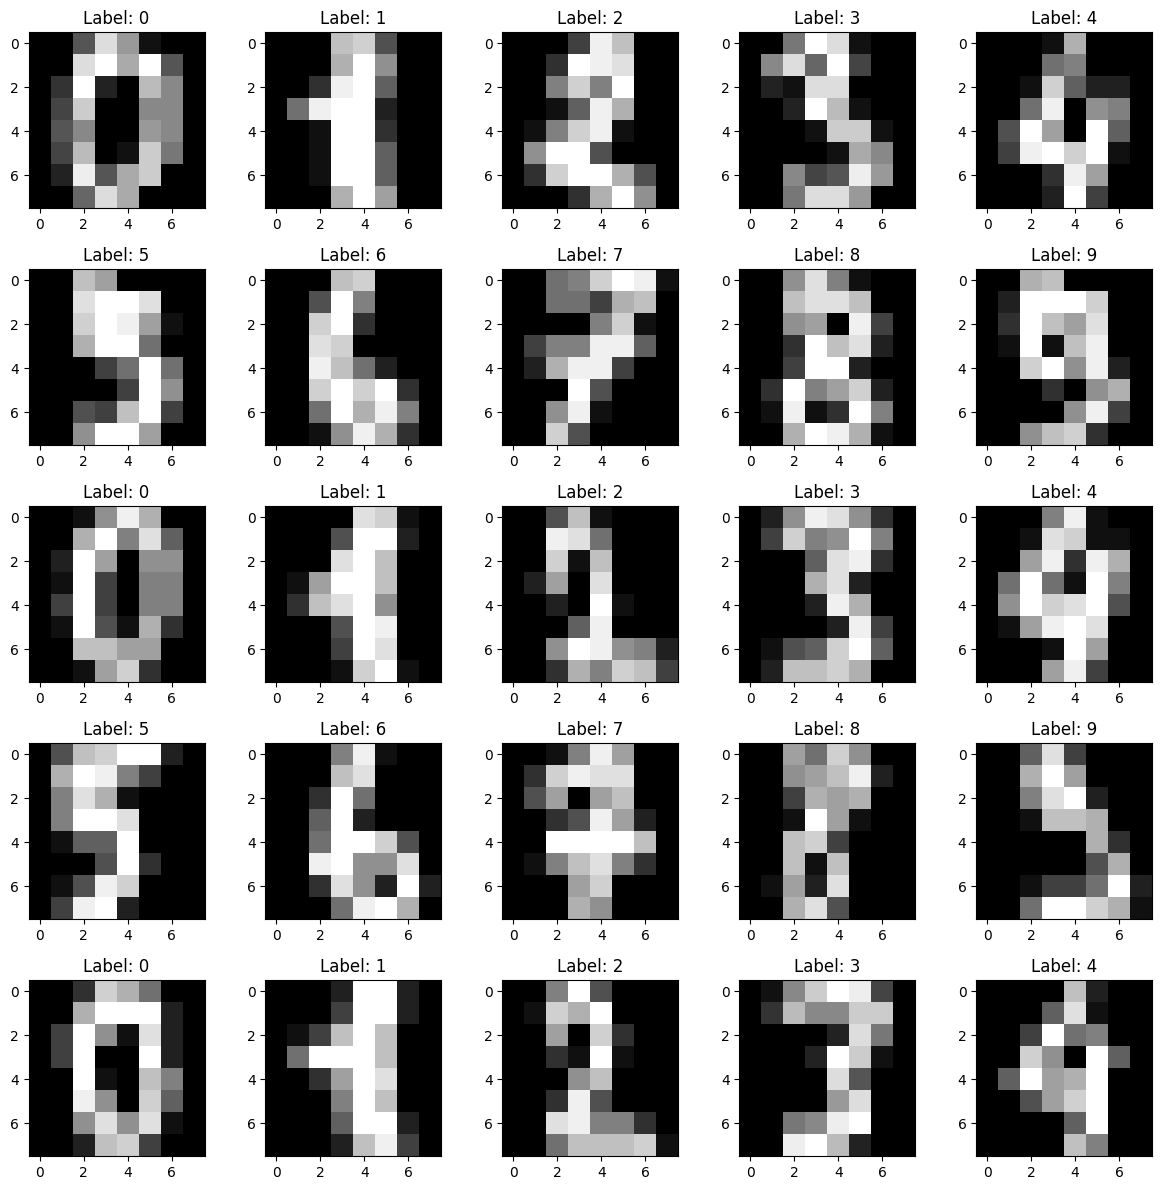

In [81]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
for i, ax in enumerate(axs.flat):
    ax.imshow(digits_dict["images"][i], cmap="gray")
    ax.set_title(f"Label: {digits_dict['target'][i]}")

plt.tight_layout()
plt.show()


### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test**
     * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
     * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
  
* **modelo**:
     * Instanciar el modelo objetivo desde la librería sklearn.

* **Métricas**:
     * Graficar matriz de confusión.
     * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [72]:
# features, target

X = digits.drop(columns="target").values
y = digits["target"].values

In [82]:
from sklearn.model_selection import train_test_split
import time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Regresión logística:**

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
# Crear el modelo de regresión logística
log_reg = LogisticRegression()

# Entrenar el modelo
start_time = time.time()
log_reg.fit(X_train, y_train)
end_time = time.time()

# Hacer predicciones en el conjunto de prueba
y_pred_RL = log_reg.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred_RL)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_RL)
print("Confusion Matrix:\n", conf_matrix)
print("Tiempo:", end_time-start_time)

Accuracy: 96.94%
Confusion Matrix:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 44  0  1  0  0  0]
 [ 0  0  1  0  0 44  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]
Tiempo: 0.7950825691223145


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**K-Nearest Neighbors:**

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

start_time = time.time()
knn.fit(X_train,y_train)
end_time = time.time()

print("Tiempo de entrenamiento: ",end_time-start_time)

y_pred_KNN = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_KNN)
print(f"Accuracy: {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred_KNN)
print("Confusion Matrix:\n", conf_matrix)

Tiempo de entrenamiento:  0.004672527313232422
Accuracy: 98.61%
Confusion Matrix:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 30  0]
 [ 0  0  0  0  1  1  0  0  0 38]]


**DecisionTreeClassifier:**

In [85]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier(random_state=42)

start_time = time.time()
decisiontree.fit(X_train,y_train)
end_time = time.time()

training_time = end_time - start_time
print(f"Tiempo de entrenamiento: {training_time:.4f} segundos")


# Hacer predicciones en el conjunto de prueba
y_pred_DTC = decisiontree.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred_DTC)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_DTC)
print("Confusion Matrix:\n", conf_matrix)

Tiempo de entrenamiento: 0.1172 segundos
Accuracy: 84.17%
Confusion Matrix:
 [[29  0  0  0  2  1  0  0  0  1]
 [ 0 22  1  0  1  0  0  1  2  1]
 [ 0  0 24  3  1  1  1  1  2  0]
 [ 0  0  1 29  0  1  0  1  1  1]
 [ 0  0  1  0 42  0  0  2  1  0]
 [ 0  0  1  0  1 40  0  0  1  4]
 [ 1  0  0  0  1  1 32  0  0  0]
 [ 0  0  0  2  1  0  0 31  0  0]
 [ 0  3  0  1  0  1  0  0 21  4]
 [ 0  1  0  3  1  0  0  2  0 33]]


El modelo que mejor aproximó los datos fue K-Nearest-Neighbours, además de tener el tiempo de entrenamiento más corto.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el **mejor modelo entontrado** en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:


 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

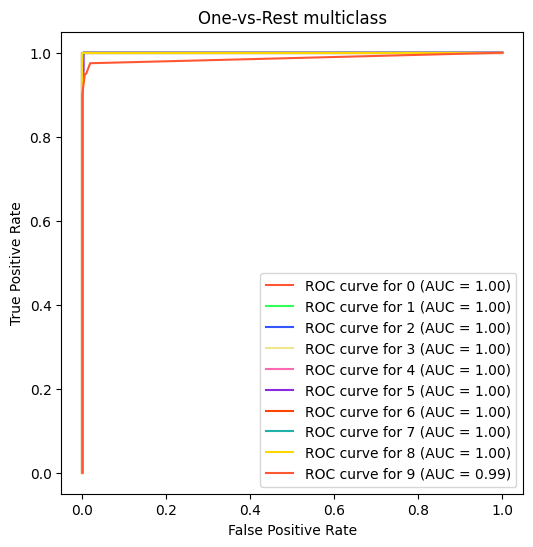

In [86]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from itertools import cycle

target_names = [str(x) for x in digits['target'].unique()]
n_classes = len(target_names)
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_score = knn.predict_proba(X_test)
fig, ax = plt.subplots(figsize=(6, 6))

colors = cycle(["#FF5733", "#33FF57", "#3357FF",
                "#F0E68C", "#FF69B4", "#8A2BE2",
                "#FF4500", "#20B2AA", "#FFD700"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
        # plot_chance_level=True,
    )

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest multiclass")
plt.legend()
plt.show()

### Ejercicio 5


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_.

In [74]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificación en particular.
    Se toman aleatoriamente los valores de los resultados.

    - label == 'correctos': muestra los valores en los que el modelo acierta.
    - label == 'incorrectos': muestra los valores en los que el modelo no acierta.

    Observación: El modelo que se recibe como argumento no debe estar entrenado.

    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: número de filas (subplots)
    :param ny: número de columnas (subplots)
    :param label: 'correctos' o 'incorrectos'
    :return: gráficos matplotlib
    """

    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"

    # Mostrar los datos incorrectos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"

    else:
        raise ValueError("Valor incorrecto")

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # Mostrar los resultados
    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))

    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

Valores predichos correctamente:


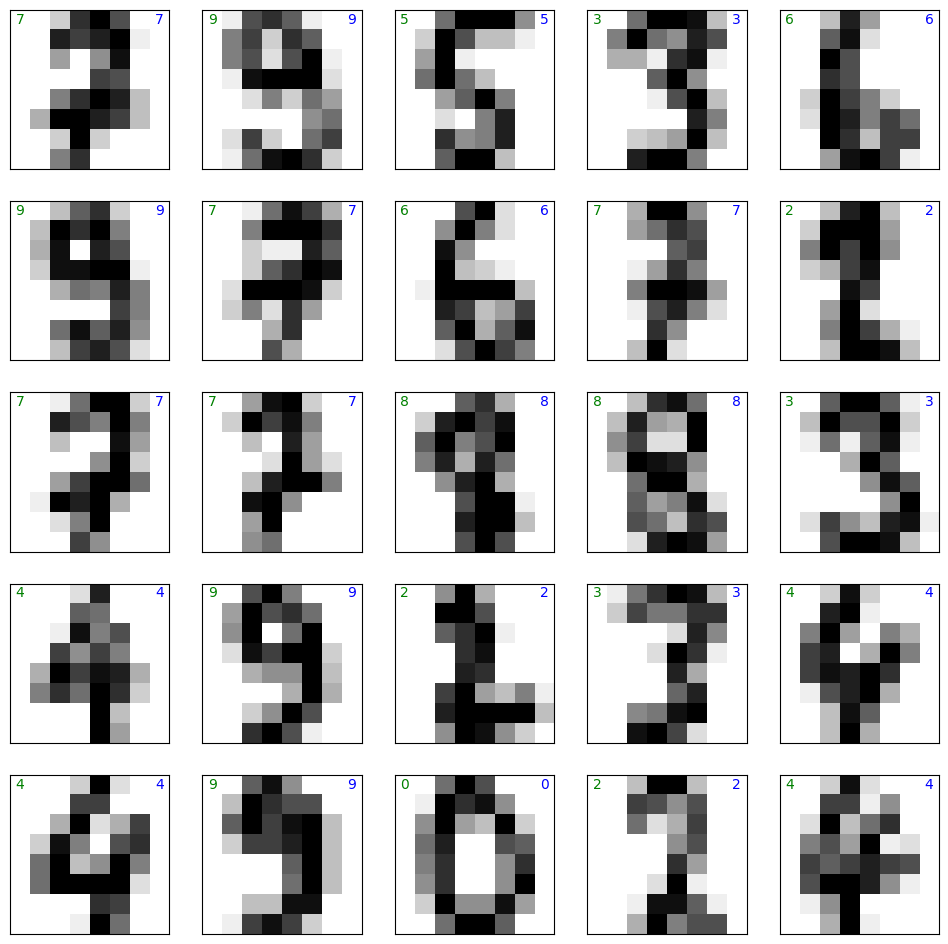


Valores predichos incorrectamente:


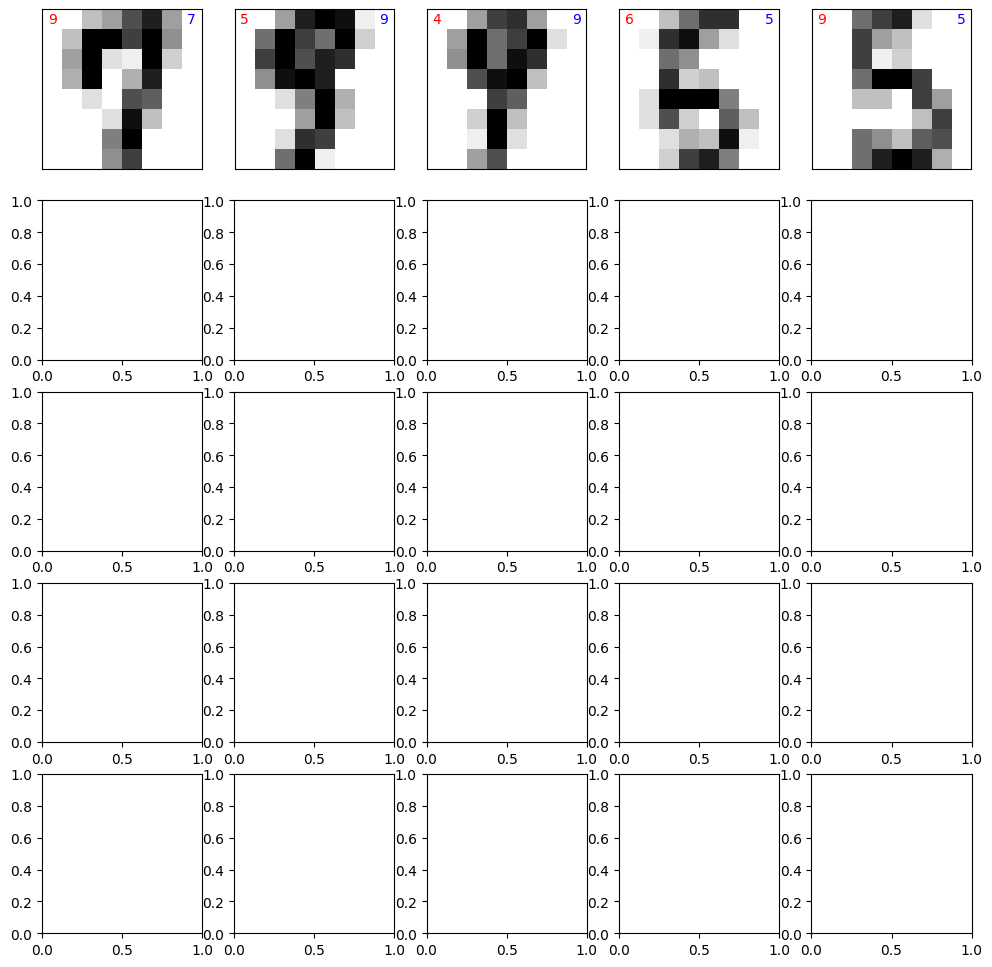

In [87]:
knn = KNeighborsClassifier()
print('Valores predichos correctamente:')
mostrar_resultados(digits, knn, nx=5, ny=5, label="correctos")
print('\nValores predichos incorrectamente:')
mostrar_resultados(digits, knn, nx=5, ny=5, label="incorrectos")

### Ejercicio 6
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

Vemos que en general los datos sí que fueron aproximados correctamente con un margen de error bajo. Los modelos utilizados tambien tuvieron una buena aproximación en un tiempo bajo. Sería interesante trabajar con una data más grande o con imagenes de calidad mejor.